# Sprint セグメンテーション1

## 1.このSprintについて

### Sprintの目的
- コンピュータビジョンの代表的タスクであるセグメンテーションを学ぶ

### どのように学ぶか
- 公開されている実装を用いてKaggleコンペティションのデータでセグメンテーションを行います。

## 2.セグメンテーション

KaggleのTGS Salt Identification Challengeのデータセットを使用し、セグメンテーションを行います。

<a href="https://www.kaggle.com/c/tgs-salt-identification-challenge/data">
TGS Salt Identification Challenge | Kaggle
</a>

セグメンテーション手法としてU-Net[1]を使います。


[1]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015


https://arxiv.org/pdf/1505.04597.pdf

## 【環境準備】

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import json
token = {"username":"obata1205","key":"c4df25145c33a6816257fc6d34791563"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!mkdir　/root/.kaggle/
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/
!chmod 600 /content/.kaggle/kaggle.json

/bin/bash: mkdir　/root/.kaggle/: No such file or directory


In [ ]:
!pwd
!kaggle -h
!kaggle competitions list

/content
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings
ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  --

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/'

/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19


In [ ]:
!mkdir data

In [ ]:
cd ./data

/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data


In [ ]:
!kaggle competitions download -c tgs-salt-identification-challenge

 85% 35.0M/41.4M [00:00<00:00, 92.8MB/s]
100% 41.4M/41.4M [00:00<00:00, 105MB/s] 
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 10.3MB/s]
 98% 37.0M/37.9M [00:00<00:00, 112MB/s]
100% 37.9M/37.9M [00:00<00:00, 122MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 36.3MB/s]
 99% 215M/217M [00:04<00:00, 70.0MB/s]
100% 217M/217M [00:04<00:00, 47.5MB/s]
 98% 160M/163M [00:03<00:00, 38.8MB/s]
100% 163M/163M [00:03<00:00, 45.1MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 34.7MB/s]


In [ ]:
!ls | grep '.*zip' | xargs -I % -t unzip %

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   
  inflating: images/302ea1ac81.png   
  inflating: image

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19'

/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19


In [ ]:
# !rm -fr ./unet
!git clone https://github.com/zhixuhao/unet

Cloning into 'unet'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 18.48 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (253/253), done.


## 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください。

<a href="https://github.com/zhixuhao/unet">
zhixuhao/unet: unet for image segmentation
</a>

《GPU環境での学習》


大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。


《新たなデータセットの適用》


公開されている実装で用意されたものとは異なるデータセットを入力するための準備が必要です。



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
cd '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet/'

/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet


In [ ]:
ll

total 36
drwx------ 3 root 4096 Sep 29 04:39 data/
-rw------- 1 root 3831 Sep 29 04:39 dataPrepare.ipynb
-rw------- 1 root 5076 Sep 29 04:39 data.py
drwx------ 2 root 4096 Sep 29 04:39 img/
-rw------- 1 root 1065 Sep 29 04:39 LICENSE
-rw------- 1 root  821 Sep 29 04:39 main.py
-rw------- 1 root 3745 Sep 29 04:39 model.py
-rw------- 1 root 2552 Sep 29 04:39 README.md
-rw------- 1 root 9802 Sep 29 04:39 trainUnet.ipynb


In [ ]:
!cat main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

In [ ]:
# とりあえず動かしてみる・・・
!python3 main.py

2020-09-29 04:40:25.395891: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 04:40:26.641921: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 04:40:26.654722: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 04:40:26.655288: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 04:40:26.655338: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 04:40:26.657534: I tensorflow/stream_executor/pl

In [ ]:
# ここがエラー？？
!cat ./model.py | grep 'input ='

    model = Model(input = inputs, output = conv10)


In [ ]:
!cp -p ./bk_model.py ./model.py

In [ ]:
!cp -p ./bk_model.py ./model.py
!cp -p ./model.py ./bk_model.py
!ls -l ./bk_model.py
!sed -i -e 's/input = //g' ./model.py
!cat ./model.py | tail -n 15

-rw-------+ 1 root root 3745 Sep 29 04:39 ./bk_model.py
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model




In [ ]:
# もう一回チャレンジ・・・
!python3 main.py

2020-09-29 04:42:05.759275: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 04:42:06.996612: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 04:42:07.009326: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 04:42:07.009892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 04:42:07.009935: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 04:42:07.011796: I tensorflow/stream_executor/pl

In [ ]:
# 同様に修正
!cp -p ./bk_model.py ./model.py
!cp -p ./model.py ./bk_model.py
!ls -l ./bk_model.py
!sed -i -e 's/input = //g' ./model.py
!sed -i -e 's/output = //g' ./model.py
!cat ./model.py | tail -n 15

-rw-------+ 1 root root 3745 Sep 29 04:39 ./bk_model.py
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs, conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model




In [ ]:
# 泣きのもう一回・・・
!python3 main.py

2020-09-29 04:44:31.821921: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 04:44:33.071097: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 04:44:33.083791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 04:44:33.084332: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 04:44:33.084371: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 04:44:33.086187: I tensorflow/stream_executor/pl

In [ ]:
# できた！
ll data/membrane/test/

total 7276
-rw------- 1 root 214932 Sep 29 04:39 0.png
-rw------- 1 root  33145 Sep 29 04:45 0_predict.png
-rw------- 1 root 216258 Sep 29 04:39 10.png
-rw------- 1 root  35696 Sep 29 04:45 10_predict.png
-rw------- 1 root 212360 Sep 29 04:39 11.png
-rw------- 1 root  36048 Sep 29 04:45 11_predict.png
-rw------- 1 root 218424 Sep 29 04:39 12.png
-rw------- 1 root  37578 Sep 29 04:45 12_predict.png
-rw------- 1 root 216843 Sep 29 04:39 13.png
-rw------- 1 root  36604 Sep 29 04:45 13_predict.png
-rw------- 1 root 215779 Sep 29 04:39 14.png
-rw------- 1 root  36194 Sep 29 04:45 14_predict.png
-rw------- 1 root 213389 Sep 29 04:39 15.png
-rw------- 1 root  36823 Sep 29 04:45 15_predict.png
-rw------- 1 root 210724 Sep 29 04:39 16.png
-rw------- 1 root  37781 Sep 29 04:45 16_predict.png
-rw------- 1 root 210481 Sep 29 04:39 17.png
-rw------- 1 root  37618 Sep 29 04:45 17_predict.png
-rw------- 1 root 210865 Sep 29 04:39 18.png
-rw------- 1 root  38625 Sep 29 04:45 18_predict.png
-rw------- 

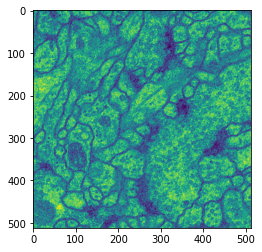

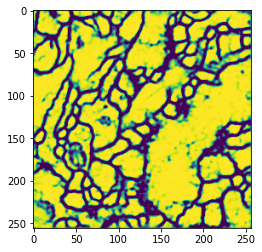

In [ ]:
# 確認
with Image.open('./data/membrane/test/9.png') as img:
    plt.imshow(img)
    plt.show()

with Image.open('./data/membrane/test/9_predict.png') as img:
    plt.imshow(img)
    plt.show()

In [ ]:
# 解凍漏れ  ・・・と思ったが、解凍後のディレクトリ名がtestではなく、imagesだったため解答済みだった。
!unzip ../data/test.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/187ecc32d5.png   
  inflating: images/54538419f5.png   
  inflating: images/93614d4b95.png   
  inflating: images/50a91adce8.png   
  inflating: images/97d23cea10.png   
  inflating: images/ca04c19c0b.png   
  inflating: images/d168218bac.png   
  inflating: images/a670e833a4.png   
  inflating: images/a964a0f499.png   
  inflating: images/371bf59030.png   
  inflating: images/fc74f77bae.png   
  inflating: images/f63dc1e3be.png   
  inflating: images/b807539a5f.png   
  inflating: images/1dfcbf4bca.png   
  inflating: images/a971d2ae53.png   
  inflating: images/4ad823e2d3.png   
  inflating: images/85a9687a4f.png   
  inflating: images/da5b430ecd.png   
  inflating: images/b1a2903d1c.png   
  inflating: images/70958cacd4.png   
  inflating: images/2093e5c98e.png   
  inflating: images/f2c108fd0b.png   
  inflating: images/56b0d83562.png   
  inflating: images/09aa9bde24.png   
  inflating: images/3cb4906b6e.png   
  inflating: image

### Kaggleのデータセットでチャレンジ

In [ ]:
# %load main.py

In [ ]:
!cat main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)

In [ ]:
%%writefile main.py
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'../data/train/','images','masks', data_gen_args, save_to_dir = None)

model = unet(input_size=(256, 256, 1))
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("../data/images")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("../data/images",results)

Overwriting main.py


In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet'

In [ ]:
ll ../data/train/

total 8
drwx------ 2 root 4096 Jul 11  2018 images/
drwx------ 2 root 4096 Jul 11  2018 masks/


In [ ]:
!cat main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'../data/train/','images','masks',data_gen_args,save_to_dir = None)

model = unet(input_size=(256, 256, 3))
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("../data/images")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("../data/images",results)

In [ ]:
!python3 main.py

2020-09-29 07:53:21.730146: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 07:53:22.976391: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 07:53:22.988799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 07:53:22.989343: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 07:53:22.989383: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 07:53:22.991062: I tensorflow/stream_executor/pl

In [ ]:
# test画像のファイル名が連番でないとエラーになるようなので修正

In [ ]:
# メモ
#  ls | sed -e s/\.txt// | awk '{print $1 ".txt " $1 "_document.md"}' | xargs -n 2 mv

In [ ]:
%pushd '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images'
!ls ./*.png | awk '{ printf "mv %s %s.png\n", $0, NR }' | sh
%popd

/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images
/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet
popd -> /content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet


In [ ]:
# 0始まりのファイルがないので一部修正
%pushd '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images'
!ls | sed 's/.png//g' | sort -n | head -n 5
!ls | sed 's/.png//g' | sort -n | tail -n 5
!mv ./15422.png ./0.png
!ls | sed 's/.png//g' | sort -n | head -n 5
%popd

/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images
1
2
3
4
5
15418
15419
15420
15421
15422
0
1
2
3
4
/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet
popd -> /content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/unet


In [ ]:
# 再度実行
!python3 main.py

2020-09-29 08:19:58.567788: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 08:19:59.820416: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-29 08:19:59.837600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-29 08:19:59.838165: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2020-09-29 08:19:59.838208: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-29 08:19:59.840267: I tensorflow/stream_executor/pl

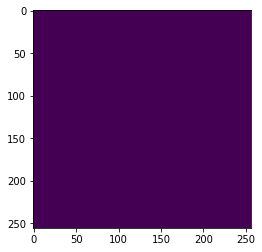

In [ ]:
with Image.open('/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images/7_predict.png') as img:
    plt.imshow(img)
    plt.show()

In [ ]:
ll '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images/7_predict.png'

-rw------- 1 root 369 Sep 29 08:27 '/content/drive/My Drive/Colab Notebooks/dive_into_code/Sprint19/data/images/7_predict.png'


## 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

### ■ main.py

- import
  - model : model.py内を全てインポート
  - data :  data.py内を全てインポート

- process
  1. 画像データのオーギュメンテーション用パラメータを設定 -> data_gen_args
  2. trainGenerator() : 上記パラメータを使用したデータローダー。画像のリサイズ・正規化・拡張済みのデータセットをバッチサイズで保持 -> myGene
  3. unetモデルをインスタンス化 -> model
  4. keras.ModelCheckpoint() : 各エポック終了後にモデルを保存
  5. model.fit_generator() : バッチ毎のデータで訓練
  6. testGenerator() : テストデータ用の画像リサイズ・正規化処理
  7. model.predict_generator : バッチ毎の推論処理
  8. saveResult : 推論結果を保存

- inputs
  - トレーニングデータの画像とマスク画像、およびテスト画像


- outputs
  - 推論結果を指定フォルダ内へ保存


```
from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"


data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

testGene = testGenerator("data/membrane/test")
results = model.predict_generator(testGene,30,verbose=1)
saveResult("data/membrane/test",results)
```

### ■ model.py

- import
  - kerasなど


- process
  - unet() : unetモデルを定義


- inputs(parameters)
  - pretrained_weights = None : 事前学習の重みを使用する場合に使用
  - input_size = (256,256,1) : 入力画像のサイズ


- outputs
  - model : unetモデルを返却


```
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model
```

### ■ data.py
- import
  - 画像処理系ライブラリ


- trainGenerator()
```
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
     画像とマスクを同時に生成できます
     image_datagenとmask_datagenに同じシードを使用して、画像とマスクの変換が同じであることを確認します
     ジェネレーターの結果を視覚化する場合は、save_to_dir = "yourpath"を設定します
```
  - inputs(parameters)
    - batch_size : 
    - train_path : 
    - image_folder : 
    - mask_folder :
    - aug_dict :
    - image_color_mode = 'grayscale' : 
    - mask_color_mode = 'grayscale' : 
    - image_save_prefix = 'image' :
    - mask_save_prefix = 'mask' :
    - flag_multi_class = False : 
    - num_class = 2 : 
    - save_to_dir = None : 
    - target_size = (256,256) : 
    - seed = 1 : 

  - outputs
    - tuple (img, mask) : 加工済みの画像(train,mask)をバッチサイズ毎に返却(yield)

  - process
    - kerasのImageDataGeneratorでtrain, maskデータ両方を前処理(リサイズ・オーギュメンテーションなど)
    - adjustData() : 次元数・正規化などのデータの調整
    - yieldでバッチサイズ毎に返却



- testGenerator()
<br> テストデータ用の画像前処理
  
  - inputs
    - test_path : 
    - num_image = 30 : 
    - target_size = (256, 256) : 
    - flag_multi_class = False : 
    - as_gray = True : 

  - outputs
    - リサイズ・正規化したバッチ毎のテスト画像をyieldで返却


```
  
from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

COLOR_DICT = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])


def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)



def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)



def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(test_path,"%d.png"%i),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img


def geneTrainNpy(image_path,mask_path,flag_multi_class = False,num_class = 2,image_prefix = "image",mask_prefix = "mask",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"%s*.png"%image_prefix))
    image_arr = []
    mask_arr = []
    for index,item in enumerate(image_name_arr):
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
        mask = io.imread(item.replace(image_path,mask_path).replace(image_prefix,mask_prefix),as_gray = mask_as_gray)
        mask = np.reshape(mask,mask.shape + (1,)) if mask_as_gray else mask
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        image_arr.append(img)
        mask_arr.append(mask)
    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr,mask_arr


def labelVisualize(num_class,color_dict,img):
    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i,:] = color_dict[i]
    return img_out / 255



def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)
```

In [ ]:
# # 下記を初めて知ったためテスト
# import skimage.io as io